### 統計的モデリング

- モデル：現実世界の理解や予測に活用することができます。
- 数理モデル：現象を数式で表現したモデル
- 確率モデル：不確実性を確率理論を用いてモデルに取り組んだモデル
- 統計モデル：データに適合するように構築された確率モデル

#### モデルの構築＝モデルの特定＋パラメタ推定

#### 情報量基準による変数選択
- 情報量基準は推定されたモデルの”良さ（の一面）”を」定量化した指標です。
- 赤池の情報量基準(Akaike's information criterion: AIC)などしばしば使われます。AICは小さければ小さいほど”良いモデル”だと判断されます。

$
AIC = -2 * (最大化対数尤度ー推定されたパラメタの個数)
$

#### パラメタ推定：尤度の最大化
- 尤度：パラメタが定まった時における、標本が得られる確率（密度）
- 尤度関数：パラメタを指定すると尤度が計算される関数
- 対数尤度：尤度の対数を取ったもの(単調増加、掛け算が足し算になる、絶対値が極端に小さくなりにくい)
- 最尤法：尤度や対数尤度を最大にするパラメタを、パラメタの推定値として採用する方法
- 最尤推定量：最尤法によって推定されたパラメタ

#### 予測精度の評価と変数選択
- AICは予測精度のよさを重視します。**相対エントロピー**は「真の分布と統計モデルにより得られた分布との差異」を測る指標を学びます。
$
相対エントロピー=\int{g(x) log{\frac{g(x)}{f(x)}}}
$

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [2]:
!pip install statsmodels
import statsmodels

     |████████████████████████████████| 9.6 MB 111 kB/s eta 0:00:01


In [34]:
# Create data
#Create random data
np.random.seed(seed=30) 
norm_dist = stats.norm(loc=40, scale=10)
beer = norm_dist.rvs(size=20)

norm_dist2 = stats.norm(loc=20, scale=5)
temperature = norm_dist2.rvs(size=20)

data = np.zeros((20,2))
data[:,0] = beer
data[:,1] = temperature

df = pd.DataFrame(data)
df.columns = ['beer', 'temperature']
print(df.head())

        beer  temperature
0  27.359473    19.971110
1  55.279054    17.662605
2  30.292891    17.884924
3  44.705596    25.322410
4  38.993033     5.483162


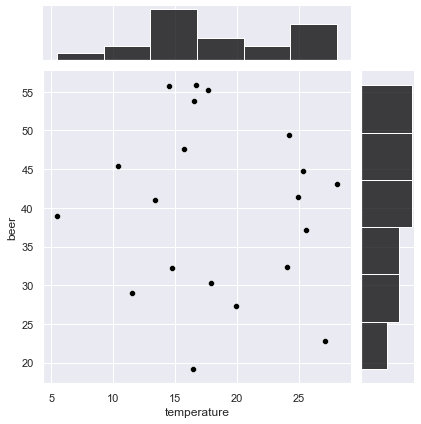

In [35]:
sns.jointplot(x='temperature', y = 'beer', data=df,color='black')

In [36]:
lm_model = smf.ols(formula='beer ~ temperature', data=df).fit()

In [37]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.2094
Date:                Fri, 13 Nov 2020   Prob (F-statistic):              0.653
Time:                        07:56:45   Log-Likelihood:                -76.014
No. Observations:                  20   AIC:                             156.0
Df Residuals:                      18   BIC:                             158.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.7046      8.227      5.312      0.000      26.421      60.989
temperature    -0.1933      0.422     -0.458      0.653      -1.081       0.694
==============================================================================
Omnibus:                        1.687   Durbin-Watson:                   2.922
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.031
Skew:                          -0.199   Prob(JB):                        0.597
Kurtosis:                       1.961   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

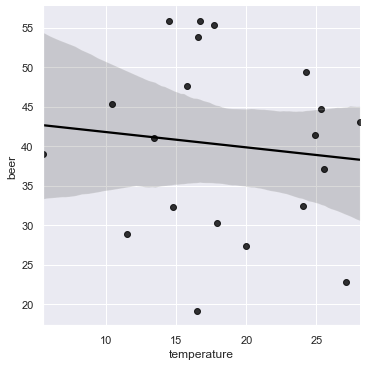

In [38]:
sns.lmplot(x='temperature', y='beer', data=df, scatter_kws={'color':'black'},
          line_kws={'color':'black'})

In [39]:
#残差
resid = lm_model.resid
resid.head()

0   -12.485166
1    14.988232
2    -9.954962
3     5.895244
4    -3.651804
dtype: float64

/Users/narenbao/anaconda3/envs/op/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

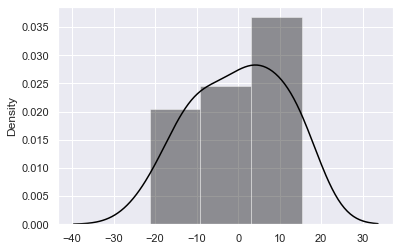

In [46]:
sns.distplot(resid, color='black')

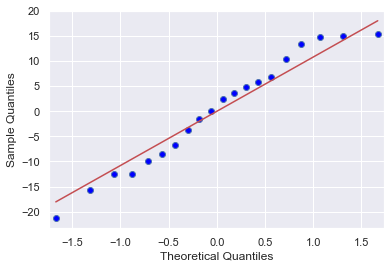

In [47]:
fig = sm.qqplot(resid, line='s')
#残差が正規分布に従っていれば、この線上にポイントされる